In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn import metrics
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

In [2]:
def mostrar_digito(digito):
    digito = digito.reshape(8, 8)

    plt.imshow(digito, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    plt.show()

# Cargando los Datos (MNIST)

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()

x = digits.data
x.shape

(1797, 64)

In [4]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

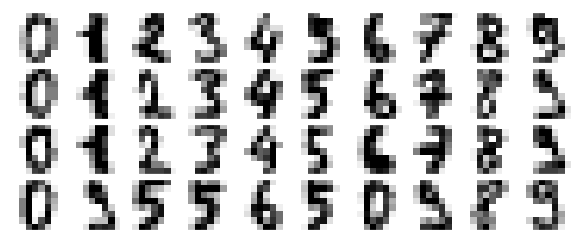

In [5]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(x)

In [23]:
#### PCA a 2 dimensiones ######
#Normalizando
x_new = (x/255)

pca = PCA(n_components=2)
X2D = pca.fit_transform(x) #new features matrix

In [24]:
print(x.shape)
print(X2D.shape)

(1797, 64)
(1797, 2)


Text(0,0.5,'component 2')

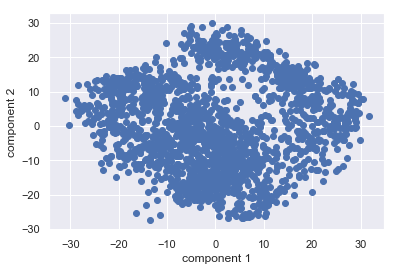

In [25]:
plt.scatter(X2D[:, 0], X2D[:, 1])
plt.xlabel('component 1')
plt.ylabel('component 2')


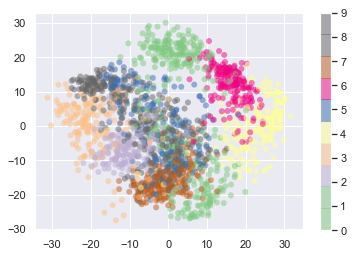

In [26]:
plt.scatter(X2D[:, 0], X2D[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.colorbar()

## K-means Clustering con Sklearn

[Documentacion oficial](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [33]:
## K-means
kmeans = KMeans(n_clusters=10)
kmeans_fit = kmeans.fit(X2D) 


array([3, 5, 7, ..., 7, 9, 1], dtype=int32)

In [34]:
clusters = kmeans_fit.predict(X2D)## clustes de kmeans

In [35]:
kmeans.cluster_centers_.shape

(10, 2)

In [38]:
centers = kmeans.cluster_centers_

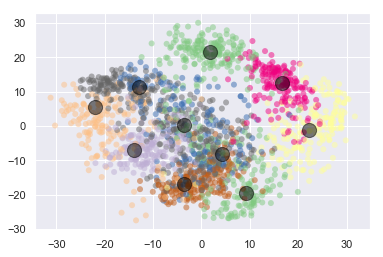

In [39]:
plt.scatter(X2D[:, 0], X2D[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
